In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

100% 329M/330M [00:16<00:00, 23.8MB/s]
100% 330M/330M [00:16<00:00, 20.8MB/s]


In [6]:
! mkdir faces

In [7]:
! unzip /content/face-mask-12k-images-dataset.zip -d faces

Streaming output truncated to the last 5000 lines.
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: faces/Face M

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/face'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
# file is a pre-trained cascade classifier provided by OpenCV for detecting frontal faces in images
face_model = cv2.CascadeClassifier('/content/haarcascade-frontalface-default.xml')

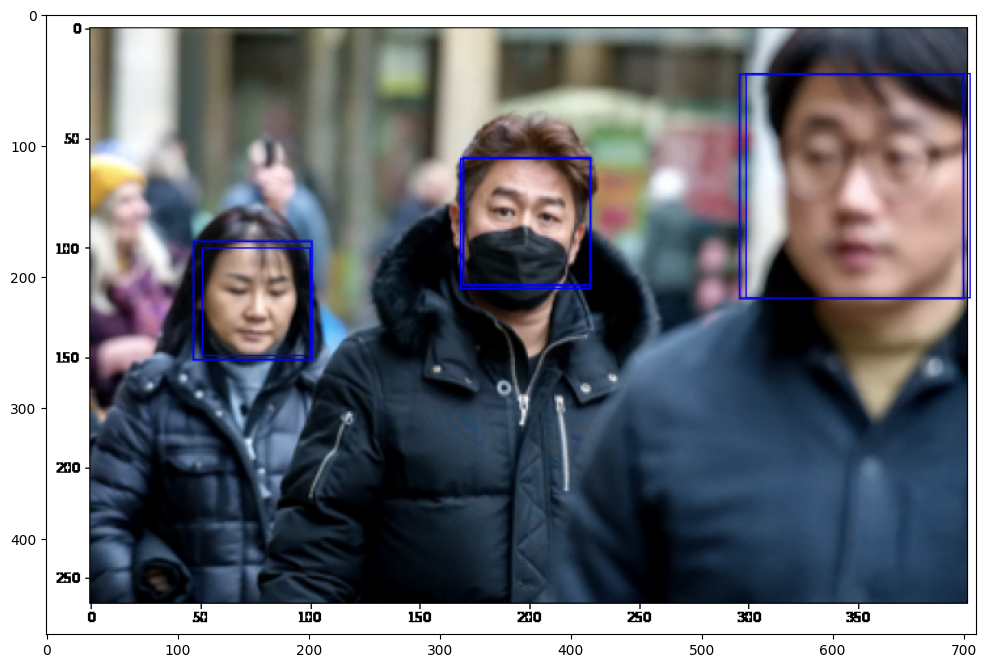

In [23]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('/content/__results___7_1.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=2) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
# The code iterates over each detected face in the faces list, which contains the coordinates and dimensions
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1) #(x,y) The starting point (top-left corner) of the rectangle,
   #(x+w, y+h): The ending point (bottom-right corner) .  The thickness of the rectangle border.
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

from keras.models import Model, Sequential
from keras import layers
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# visulization function for Models
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(6, 4))

    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()

    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# The lowest face in the photo
MIN_DISTANCE = 130

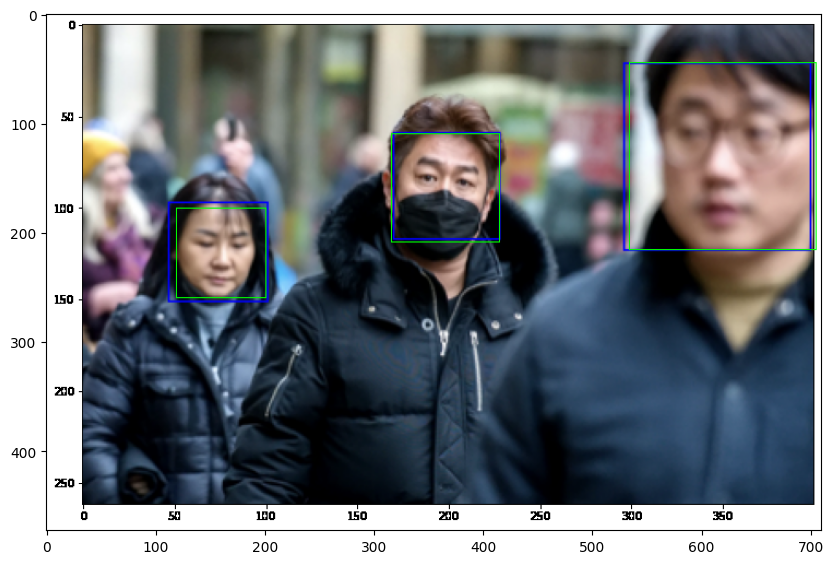

In [ ]:
# It checks if the number of detected faces is greater than or equal to 2.
if len(faces)>=2:
  # If so, it initializes a list label with zeros, where each element corresponds to a detected face.
    label = [0 for i in range(len(faces))]
    # It then iterates over all pairs of detected faces and calculates the Euclidean distance between their centers.
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            #If the distance is less than MIN_DISTANCE, it marks both faces as belonging to the same cluster by setting their corresponding elements in the label list to 1.
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

else:
    print("No. of faces detected is less than 2")

In [ ]:
#Load train and test set
train_dir = '/content/faces/Face Mask Dataset/Train'
test_dir = '/content/faces/Face Mask Dataset/Test'
val_dir = '/content/faces/Face Mask Dataset/Validation'

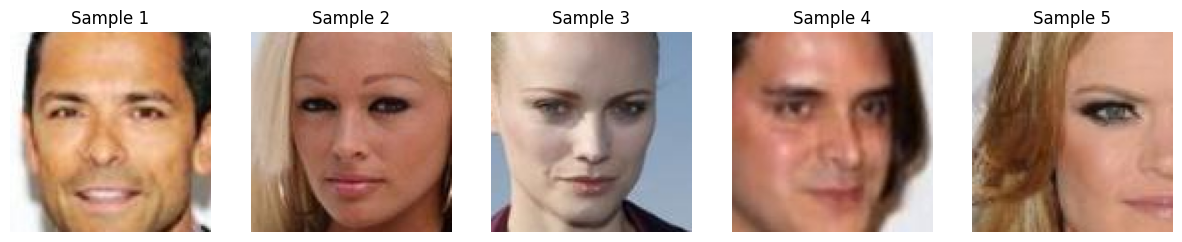

In [ ]:
import matplotlib.pyplot as plt
import os
import random

# Define a function to show a sample of data
def show_data_sample(dataset_dir, num_samples=5):
    # List all files in the dataset directory
    file_names = os.listdir(dataset_dir)

    # Select random samples
    sample_files = random.sample(file_names, num_samples)

    # Plot the images
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, file_name in enumerate(sample_files):
        img_path = os.path.join(dataset_dir, file_name)
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Sample {i+1}')
    plt.show()

# Usage
show_data_sample('/content/faces/Face Mask Dataset/Train/WithoutMask', num_samples=5)


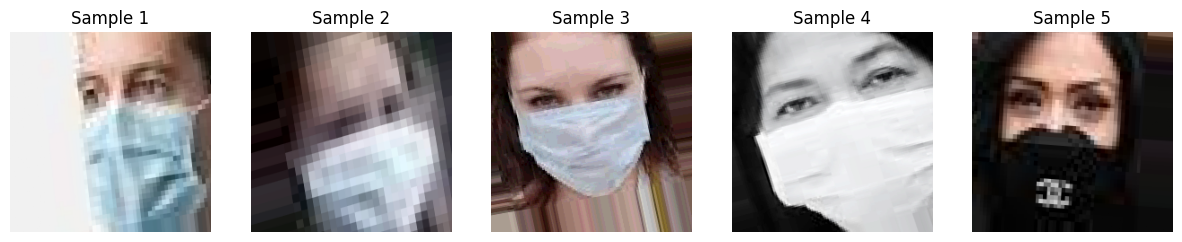

In [ ]:
show_data_sample('/content/faces/Face Mask Dataset/Train/WithMask', num_samples=5)

In [ ]:
# Data augmentation
# [0, 255] to [0, 1]. This is a common preprocessing step to normalize the pixel values
# Randomly zoom into the input images by a factor of up to 20%
#  Apply random shearing transformations to the input images by a factor of up to 20%.
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(228,228),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(228,228),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(228,228),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(228,228, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output of the last convolutional layer
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(2, activation='sigmoid'))

# Print model summary to verify the changes
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 226, 226, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 113, 113, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 53, 53, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 179776)           

In [ ]:
# add optimizer of model and loss and metrics
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,)

Epoch 1/5
313/313 [==============================] - 170s 523ms/step - loss: 0.2221 - accuracy: 0.9316 - val_loss: 0.1109 - val_accuracy: 0.9550
Epoch 2/5
313/313 [==============================] - 151s 483ms/step - loss: 0.0894 - accuracy: 0.9699 - val_loss: 0.0486 - val_accuracy: 0.9825
Epoch 3/5
313/313 [==============================] - 151s 482ms/step - loss: 0.0786 - accuracy: 0.9732 - val_loss: 0.0620 - val_accuracy: 0.9775
Epoch 4/5
313/313 [==============================] - 153s 488ms/step - loss: 0.0616 - accuracy: 0.9782 - val_loss: 0.0647 - val_accuracy: 0.9775
Epoch 5/5
313/313 [==============================] - 151s 484ms/step - loss: 0.0632 - accuracy: 0.9771 - val_loss: 0.0480 - val_accuracy: 0.9850


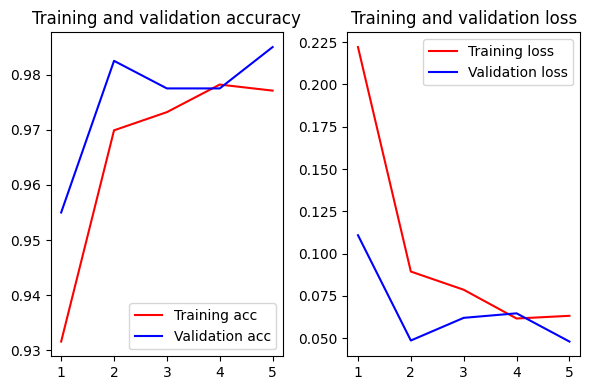

In [ ]:
visualize(history)

In [ ]:
loss_test,accuracy_test=model.evaluate(test_generator)
print(f'the loss is_test {loss_test} and the accuracy_test ={accuracy_test}')

25/25 [==============================] - 11s 426ms/step - loss: 0.0468 - accuracy: 0.9850
the loss is_test 0.046774256974458694 and the accuracy_test =0.9850000143051147


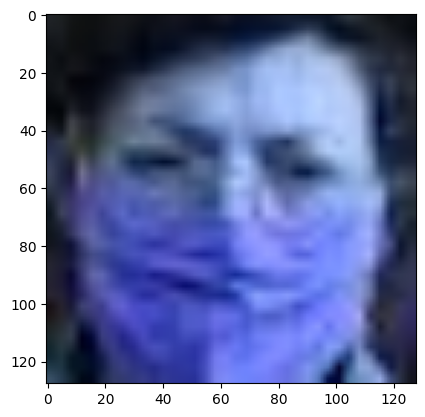

In [ ]:
sample_mask_img = cv2.imread('/content/faces/Face Mask Dataset/Test/WithMask/1163.png')
sample_mask_img = cv2.resize(sample_mask_img,(228,228))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,228,228,3])
sample_mask_img = sample_mask_img/255.0

In [ ]:
model.predict(sample_mask_img)

1/1 [==============================] - 0s 18ms/step


array([[9.9998498e-01, 1.0782778e-11]], dtype=float32)

1/1 [==============================] - 0s 19ms/step


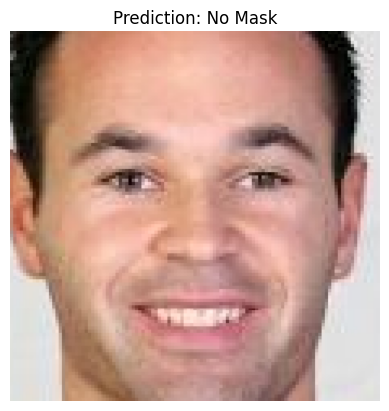

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing import image
# Define a function to predict mask or no mask and show the image
def predict_and_show(image_path, model):
    img = image.load_img(image_path, target_size=(228, 228))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalization

    # Predict
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        prediction_label = "Mask"
    else:
        prediction_label = "No Mask"

    # Show image with prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediction: {prediction_label}')
    plt.show()

# Usage
predict_and_show('/content/faces/Face Mask Dataset/Test/WithoutMask/1177.png', model)



1/1 [==============================] - 0s 45ms/step


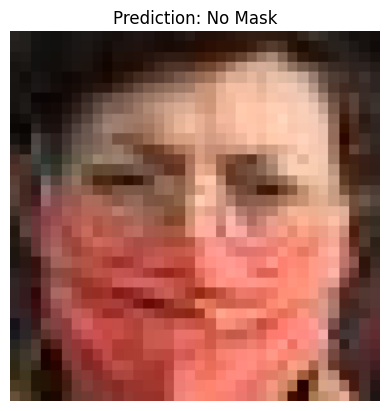

In [ ]:
predict_and_show('/content/faces/Face Mask Dataset/Test/WithMask/1163.png', model)

In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

1/1 [==============================] - 0s 20ms/step


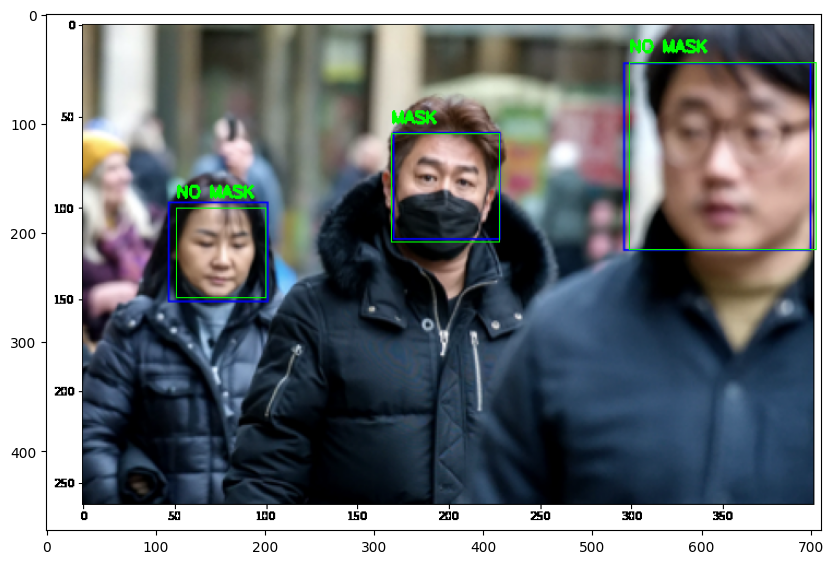

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(228,228))
        crop = np.reshape(crop,[1,228,228,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

else:
    print("No. of faces detected is less than 2")